In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<Axes: xlabel='Gene One', ylabel='Gene Two'>

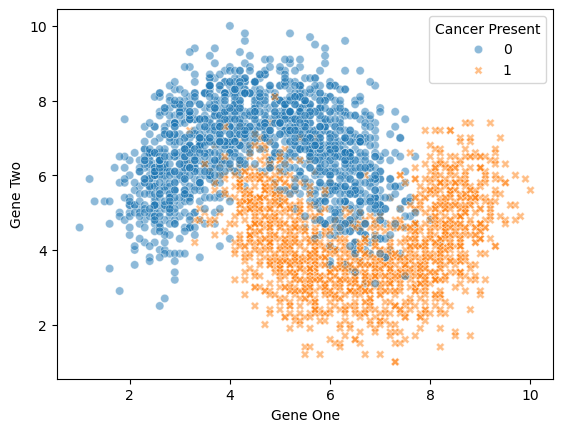

In [5]:
sns.scatterplot(x='Gene One' , y='Gene Two',
                data=df,hue='Cancer Present',alpha = 0.5,style="Cancer Present")

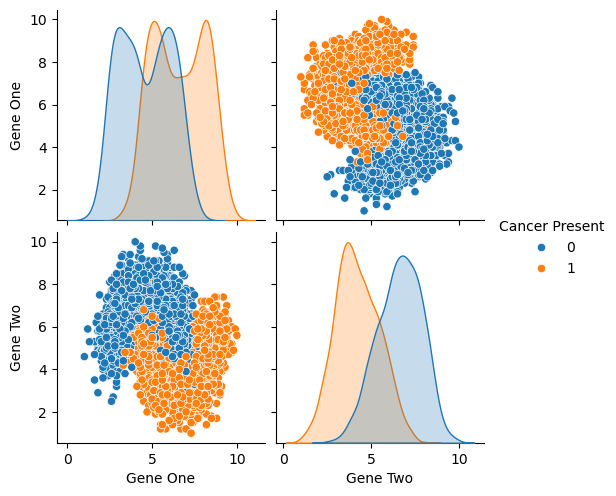

In [6]:
sns.pairplot(data=df,hue='Cancer Present')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop("Cancer Present",axis=1)
y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scale,y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred = knn.predict(X_test_scale)

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [11]:
# we exactly have a balanced dataset which give us a good 
# Recall and Precision 
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [12]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scale, y_train)

    y_pred_test = knn_model.predict(X_test_scale)

    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [13]:
test_error_rates

[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

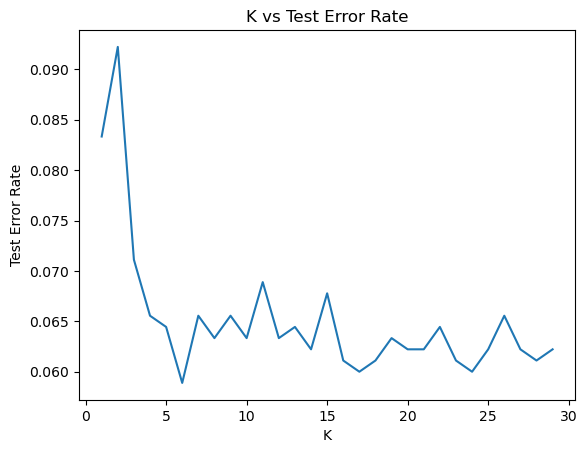

In [14]:
plt.plot(range(1,30),test_error_rates)
plt.title('K vs Test Error Rate')
plt.xlabel('K')
plt.ylabel('Test Error Rate')
plt.show()

In [15]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

param = knn.get_params()
print(param.keys())



dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [26]:
operators = [('scaler',scaler),('knn',knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operators)

from sklearn.model_selection import GridSearchCV
k_values = list(range(1,20))

In [27]:
param_grid = {'knn__n_neighbors': k_values}

In [28]:
grid_model = GridSearchCV(pipe, param_grid=param_grid,
                           cv=5 ,scoring='accuracy')

In [29]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [31]:
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [32]:
y_pred_grid = grid_model.predict(X_test)
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [33]:
new_patient =[[3.8,6.4]]

In [34]:
#new patient dose not have cancer
grid_model.predict(new_patient)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [35]:
grid_model.predict_proba(new_patient)

c:\Users\mhija\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.73684211, 0.26315789]])